# This ipython codebook will show a performance comparison of different ML techniques for emotion recognition 

First, we will import the libraries and the result file. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

UWR = pd.read_pickle("files/UWR.csv")   #File containing the Average Unweighted Recall result for each speaker 
Conf_Mat = pd.read_pickle("files/Conf_Mat.csv")  #File containing the confusion matrix for each speaker 

In [5]:
UWR

,speakers,Baseline_GNB,SVM,RF
0,1,0.577581,0.602894,0.569329
1,2,0.673377,0.66777,0.675786
2,3,0.612696,0.606681,0.607089
3,4,0.708701,0.701545,0.704852
4,5,0.616661,0.650386,0.625562
5,6,0.650514,0.657559,0.672715
6,7,0.532416,0.572404,0.593489
7,8,0.574837,0.579889,0.600976
8,9,0.73145,0.776505,0.746929
9,10,0.621817,0.715874,0.671381


In [6]:
Conf_Mat

,speakers,Baseline_GNB,SVM,RF
0,1,"[[40, 10, 15, 6], [5, 53, 6, 4], [4, 11, 12, 3...","[[42, 17, 12, 0], [2, 59, 3, 4], [5, 18, 11, 3...","[[38, 18, 12, 3], [3, 59, 4, 2], [4, 22, 9, 31..."
1,2,"[[33, 2, 4, 1], [8, 70, 16, 7], [1, 7, 13, 18]...","[[37, 2, 1, 0], [7, 85, 8, 1], [6, 15, 10, 8],...","[[37, 2, 0, 1], [6, 82, 8, 5], [3, 12, 11, 13]..."
2,3,"[[26, 0, 7, 2], [11, 79, 12, 8], [9, 12, 22, 9...","[[30, 1, 3, 1], [11, 91, 1, 7], [13, 23, 10, 6...","[[30, 2, 2, 1], [8, 94, 1, 7], [3, 28, 13, 8],..."
3,4,"[[27, 9, 4, 0], [26, 80, 7, 22], [3, 4, 42, 21...","[[26, 13, 1, 0], [7, 111, 7, 10], [8, 16, 36, ...","[[26, 14, 0, 0], [10, 107, 6, 12], [13, 10, 39..."
4,5,"[[33, 1, 3, 1], [9, 79, 11, 3], [23, 3, 13, 14...","[[34, 2, 2, 0], [2, 95, 2, 3], [23, 8, 12, 10]...","[[31, 4, 2, 1], [3, 95, 2, 2], [23, 7, 13, 10]..."
5,6,"[[57, 4, 17, 10], [19, 98, 14, 17], [22, 10, 3...","[[66, 9, 5, 8], [5, 128, 5, 10], [18, 28, 29, ...","[[67, 8, 7, 6], [8, 120, 8, 12], [26, 18, 28, ..."
6,7,"[[58, 6, 35, 12], [6, 72, 9, 9], [1, 2, 0, 4],...","[[67, 15, 17, 12], [4, 83, 3, 6], [0, 3, 0, 4]...","[[61, 14, 22, 14], [3, 86, 1, 6], [0, 2, 1, 4]..."
7,8,"[[34, 9, 16, 6], [14, 61, 17, 15], [7, 15, 22,...","[[35, 17, 11, 2], [7, 78, 9, 13], [4, 31, 15, ...","[[37, 17, 10, 1], [9, 72, 10, 16], [8, 25, 17,..."
8,9,"[[32, 4, 6, 1], [1, 118, 3, 6], [11, 6, 30, 23...","[[35, 3, 4, 1], [1, 121, 0, 6], [6, 12, 37, 15...","[[36, 4, 2, 1], [1, 121, 1, 5], [10, 14, 28, 1..."
9,10,"[[30, 5, 11, 3], [25, 92, 33, 13], [2, 4, 28, ...","[[35, 5, 7, 2], [4, 132, 17, 10], [3, 5, 32, 8...","[[34, 7, 7, 1], [11, 122, 20, 10], [3, 6, 30, ..."


In [7]:
UWR_SVM = sum(UWR["SVM"].to_list())/len(UWR)*100
UWR_RF = sum(UWR["RF"].to_list())/len(UWR)*100
UWR_Baseline_GNB = sum(UWR["Baseline_GNB"].to_list())/len(UWR)*100
print("Average Unweighted Recall using Support Vector Machine with RBF kernel is {0:.2f}%, using Random Forest is {1:.2f}% and using Baseline_GNB is {2:.2f}%".format(UWR_SVM, UWR_RF, UWR_Baseline_GNB))


Average Unweighted Recall using Support Vector Machine with RBF kernel is 65.32%, using Random Forest is 64.68% and using Baseline_GNB is 63.00%


First, we will plot the UWR result for each speaker 

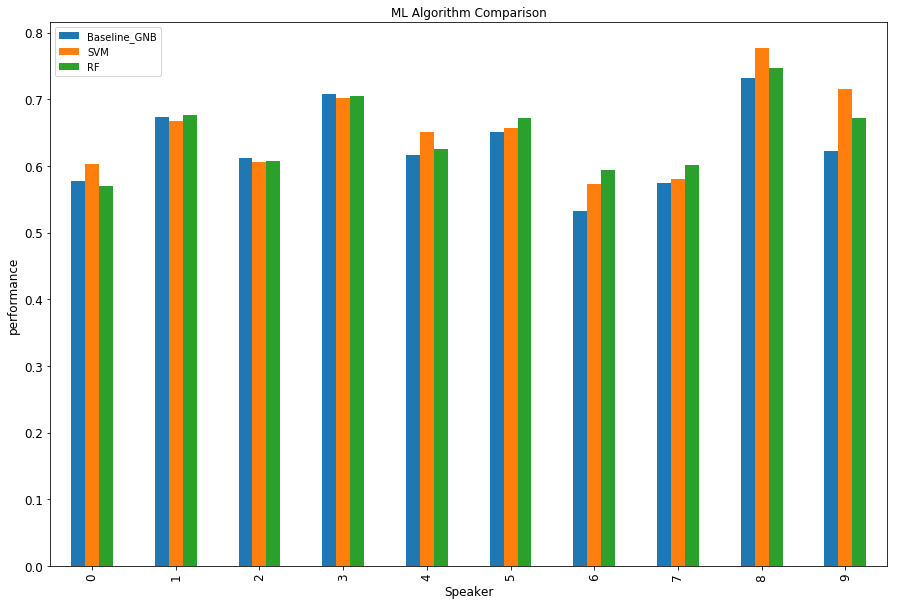

In [8]:
ax = UWR[["Baseline_GNB", "SVM", "RF"]].plot(kind='bar', title ="ML Algorithm Comparison", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Speaker", fontsize=12)
ax.set_ylabel("performance", fontsize=12)
plt.show()

The results show that SVM and RF has better performance than our baseline Gaussian Naive Bayes model. However, we need to test if the 'better' result is statistically significant. We will claim significance if p-value<0.05

In [9]:
from scipy.stats import ttest_rel

stat_SVM, p_SVM = ttest_rel(UWR["Baseline_GNB"].to_list(), UWR["SVM"].to_list())   #Comparison between GNB and SVM
stat_RF, p_RF = ttest_rel(UWR["Baseline_GNB"].to_list(), UWR["RF"].to_list())   #Comparison between GNB and SVM

print("Statistical significance between SVM and baseline is {} and RF and baseline is {}".format(p_SVM, p_RF))

Statistical significance between SVM and baseline is 0.04676954353813417 and RF and baseline is 0.050187722660954615


Therefore performance of SVM is significantly better than the baseline Gaussian NB as p-value .0467<.05 and for RF, the performance is almost significant as p-value is very near to .05

In [10]:
#Performance of SVM vs RF
stat_RF_SVM, p_RF_SVM = ttest_rel(UWR["SVM"].to_list(), UWR["RF"].to_list())   #Comparison between GNB and SVM
print(p_RF_SVM)

0.4337881248285045


Therefore, we cannto draw a statistical significant conclusion about SVM and RF performance 

### Next we will focus on emotion specific performance of one of the model. Reasonably, we choose SVM

In [11]:
SVM_conf = Conf_Mat["SVM"].to_list()

In [12]:
#Let's add up all of them

matrix = np.zeros((4,4))
for i in range(10):
    matrix = matrix + SVM_conf[i]

In [13]:
matrix

array([[407.,  84.,  63.,  26.],
       [ 50., 983.,  55.,  70.],
       [ 86., 159., 192., 124.],
       [ 22., 106.,  66., 431.]])

We will write a function to plot the confusion matrix

In [16]:
def confusion_matrix_plot(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    """
    This function will create a plot of confusion matrix and also show of per class performance
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, 2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j]),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[407.  84.  63.  26.]
 [ 50. 983.  55.  70.]
 [ 86. 159. 192. 124.]
 [ 22. 106.  66. 431.]]


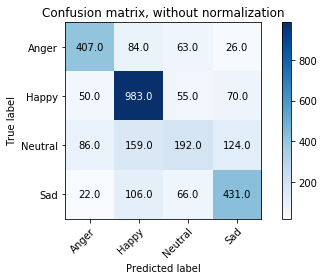

In [20]:
confusion_matrix_plot(matrix, ['Anger', 'Happy', 'Neutral', 'Sad'], normalize=False)
plt.show()

Normalized confusion matrix
[[0.7  0.14 0.11 0.04]
 [0.04 0.85 0.05 0.06]
 [0.15 0.28 0.34 0.22]
 [0.04 0.17 0.11 0.69]]


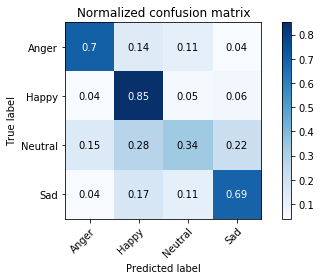

In [21]:
confusion_matrix_plot(matrix, ['Anger', 'Happy', 'Neutral', 'Sad'], normalize=True)
plt.show()

The result shows that Happy emotion is recognized most successfully. However, the performance is poor for neutral emotion. 